# Setup

In [15]:
!gdown 1Q8Q7a4jUrM2EJoaeGQkiKcdmMJ-G4fBg -O nsl_kdd.zip
!unzip nsl_kdd.zip

Downloading...
From: https://drive.google.com/uc?id=1Q8Q7a4jUrM2EJoaeGQkiKcdmMJ-G4fBg
To: /content/nsl_kdd.zip
100% 14.5M/14.5M [00:00<00:00, 160MB/s]
Archive:  nsl_kdd.zip
replace KDDTest+.arff? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: KDDTest+.arff           
replace KDDTest+.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace KDDTest+.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 
error:  invalid response [{ENTER}]
replace KDDTest+.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: KDDTest+.txt            
  inflating: KDDTest-21.arff         
  inflating: KDDTest-21.txt          
  inflating: KDDTest1.jpg            
  inflating: KDDTrain+.arff          
  inflating: KDDTrain+.txt           
  inflating: KDDTrain+_20Percent.arff  
  inflating: KDDTrain+_20Percent.txt  
  inflating: KDDTrain1.jpg           
  inflating: index.html              
  inflating: nsl-kdd/KDDTest+.arff   
  inflating: nsl-kdd/KDDTest+.txt    
  inflating: nsl-k

In [16]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import (StandardScaler, OrdinalEncoder,LabelEncoder, MinMaxScaler, OneHotEncoder)
from sklearn.preprocessing import Normalizer, MaxAbsScaler , RobustScaler, PowerTransformer

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

from keras.utils import to_categorical
from keras.layers import Dense, Conv1D, MaxPool1D, Flatten, Dropout, Input
from keras.models import Sequential, Model

In [17]:
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example:
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, cm[i, j],
          horizontalalignment="center",
          color="white" if cm[i, j] > thresh else "black")

      plt.tight_layout()
      plt.ylabel('True label')
      plt.xlabel('Predicted label')

In [18]:
features=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot",
          "num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells",
          "num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate",
          "rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
          "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate",
          "dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty"]

In [19]:
data = pd.read_csv('./nsl-kdd/KDDTrain+.txt', names=features)

data.drop(['difficulty'],axis=1,inplace=True)
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [20]:
data['label'].value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: label, dtype: int64

In [21]:
def combine_classes(df):
  df.label.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'DOS',inplace=True)
  df.label.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
  df.label.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'Other',inplace=True)
  df.label.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'Other',inplace=True)

In [22]:
combine_classes(data)
data['label'].value_counts()

normal    67343
DOS       45927
Probe     11656
Other      1047
Name: label, dtype: int64

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [24]:
encoded_data = data.copy()

numeric_columns = encoded_data.select_dtypes(include='number').columns
scaler = StandardScaler()
encoded_data[numeric_columns] = scaler.fit_transform(encoded_data[numeric_columns])

encoders = {}
for feature in encoded_data.select_dtypes(include="object").columns.values:
    encoder = preprocessing.LabelEncoder()
    encoded_data[feature] = encoder.fit_transform(encoded_data[feature])
    encoders[feature] = encoder

encoder_for_label = encoders['label']

features = encoded_data.drop(['label'], axis=1)
labels = encoded_data[['label']]

In [25]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.20, random_state=42)

In [26]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Prepare DMatrix
train_reg = xgb.DMatrix(x_train, y_train, enable_categorical=True)

params = {"objective": "multi:softprob", "num_class": len(encoder_for_label.classes_), "eval_metric": "merror"}
model = xgb.train(params=params, dtrain=train_reg, num_boost_round=1)

In [27]:
# Predictions
test_reg = xgb.DMatrix(x_test, y_test, enable_categorical=True)
y_pred = model.predict(test_reg)
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification Report
class_report = classification_report(y_test, y_pred_classes)
print(f'\nClassification Report:\n{class_report}')


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9181
           1       0.98      0.81      0.89       235
           2       0.99      0.97      0.98      2357
           3       0.99      1.00      0.99     13422

    accuracy                           0.99     25195
   macro avg       0.99      0.94      0.96     25195
weighted avg       0.99      0.99      0.99     25195



Confusion matrix, without normalization


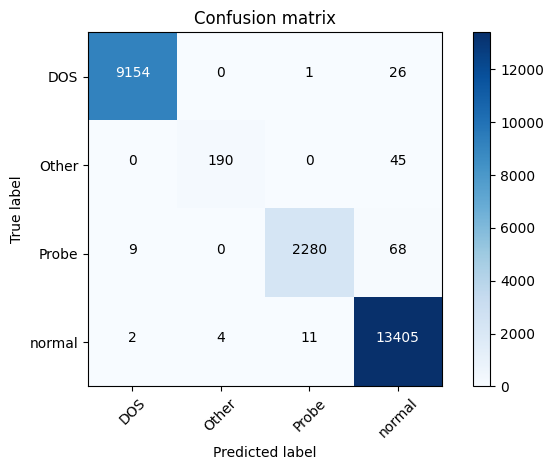

In [28]:
# Confusion Matrix
encoded_label_map = {encoded_label: original_label for encoded_label, original_label in enumerate(encoder_for_label.classes_)}
cm = confusion_matrix(y_test, y_pred_classes, labels = list(encoded_label_map.keys()))
plot_confusion_matrix(cm, classes = list(encoded_label_map.values()))

# Prediction

In [29]:
def preprocess_input(x):
    processed_data = x.copy()
    processed_data[numeric_columns] = scaler.transform(processed_data[numeric_columns])
    for feature in processed_data.select_dtypes(include="object").columns.values:
        encoder = encoders[feature]
        processed_data[feature] = encoder.transform(processed_data[feature])

    return processed_data

def predict(x):
    processed_data = preprocess_input(x)
    data_dmatrix = xgb.DMatrix(processed_data, enable_categorical=True)

    y_pred = model.predict(data_dmatrix)

    best_class_index = np.argmax(y_pred, axis=1)[0]
    best_class_probability = np.max(y_pred, axis=1)[0]
    best_class_label = encoded_label_map[best_class_index]

    return best_class_label, best_class_probability

# Variant 3

In [30]:
!pip -q install pybloom_live

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.3/285.3 kB 3.8 MB/s eta 0:00:00


In [31]:
attacks = data[data['label'] != 'normal']
attack_classes = list(attacks['label'].unique())
attacks_to_add = attacks.sample(frac=0.5, random_state=42)
value_counts = attacks_to_add['label'].value_counts()

attack_classes

['DOS', 'Other', 'Probe']

In [32]:
from pybloom_live import BloomFilter
from tqdm import tqdm

bloom_filters = {class_name: BloomFilter(capacity=value_counts.get(class_name), error_rate=0.001) for class_name in attack_classes}
normal_bloom_filter = BloomFilter(capacity=len(attacks_to_add), error_rate=0.001)

In [33]:
added_to_bloom_filters = set()

for idx, row in tqdm(attacks_to_add.iterrows(), total=len(attacks_to_add)):
    x = pd.DataFrame([row.drop('label')])
    label = row['label']
    bloom_filters[label].add(x)
    normal_bloom_filter.add(x)
    added_to_bloom_filters.add(hash(tuple(row)))

100%|██████████| 29315/29315 [07:19<00:00, 66.77it/s]


In [34]:
import time

def test_ml_bloom_filters(x, label):
    start_time = time.time()
    predicted_label, _ = predict(x)
    is_fp, is_fn = False, False
    if predicted_label == 'normal' and label != 'normal':
      is_fn = True
    elif predicted_label != 'normal':
      bloom_filter = bloom_filters[predicted_label]
      bloom_filter_contains_item = bloom_filter.__contains__(x)
      item_added = hash(tuple(x)) in added_to_bloom_filters

      is_fp = bloom_filter_contains_item and not item_added
      is_fn = item_added and not bloom_filter_contains_item

    query_time = time.time() - start_time
    return is_fp, is_fn, query_time

def test_normal_bloom_filter(x, label):
    start_time = time.time()
    bloom_filter_contains_item = normal_bloom_filter.__contains__(x)
    item_added = hash(tuple(x)) in added_to_bloom_filters
    is_fp = bloom_filter_contains_item and not item_added
    query_time = time.time() - start_time
    return is_fp, query_time

In [35]:
classes = list(data['label'].unique())
test_items = data.sample(frac=0.1, random_state=42)

# For ML Model + Class-Specific Bloom Filters
fp_ml_class_wise_counts = {class_name: 0 for class_name in classes}
fn_ml_class_wise_counts = {class_name: 0 for class_name in classes}
total_ml_time = 0

# For Normal Bloom Filter - Simulating class-wise FP
fp_bf_class_wise_counts = {class_name: 0 for class_name in classes}
total_bf_time = 0

for idx, row in tqdm(test_items.iterrows(), total=len(test_items)):
    x = pd.DataFrame([row.drop('label')])
    label = row['label']

    # Testing for ML Model + Class-Specific Bloom Filters
    is_fp_ml, is_fn_ml, ml_time = test_ml_bloom_filters(x, label)
    if is_fp_ml:
        fp_ml_class_wise_counts[label] += 1
    if is_fn_ml:
        fn_ml_class_wise_counts[label] += 1
    total_ml_time += ml_time

    # Testing for Normal Bloom Filter
    is_fp_bf, bf_time = test_normal_bloom_filter(x)
    if is_fp_bf:
        fp_bf_class_wise_counts[label] += 1
    total_bf_time += bf_time

100%|██████████| 12597/12597 [08:00<00:00, 26.21it/s]


In [36]:
value_counts = test_items['label'].value_counts()
print(value_counts)

normal    6750
DOS       4544
Probe     1185
Other      118
Name: label, dtype: int64


In [37]:
denominators_fp = {class_name: len(test_items) - value_counts.get(class_name, 0) for class_name in classes}

# FP Rates for ML model and Bloom Filter - dividing by the respective denominators
fp_rates_ml_class_wise = {class_name: fp_ml_class_wise_counts.get(class_name, 0) / denominators_fp[class_name] for class_name in classes}
fp_rates_bf_class_wise = {class_name: fp_bf_class_wise_counts.get(class_name, 0) / denominators_fp[class_name] for class_name in classes}

# FN Rates for ML model - dividing by total instances of each malicious class
fn_rates_ml_class_wise = {class_name: fn_ml_class_wise_counts.get(class_name, 0) / value_counts.get(class_name, 1) for class_name in classes}

# Average Query Times
avg_ml_time = total_ml_time / len(test_items)
avg_bf_time = total_bf_time / len(test_items)

In [38]:
!pip -q install pympler

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 3.2 MB/s eta 0:00:00


In [39]:
from pympler import asizeof

ml_model_size = asizeof.asizeof(model)
encoders_size = sum(asizeof.asizeof(encoder) for encoder in encoders.values())
ml_bloom_filters_size = sum(asizeof.asizeof(bloom_filter) for bloom_filter in bloom_filters.values())
total_ml_size = ml_model_size + ml_bloom_filters_size + encoders_size

normal_bf_size = asizeof.asizeof(normal_bloom_filter)


In [40]:
import pandas as pd

data = [{
    "Class": class_name,
    "FP Rate (ML+BF)": fp_rates_ml_class_wise[class_name],
    "FP Rate (Normal BF)": fp_rates_bf_class_wise[class_name],
    "FN Rate (ML+BF)": fn_rates_ml_class_wise[class_name]
} for class_name in classes]

results_df = pd.DataFrame(data)

overall_metrics_df = pd.DataFrame({
    "ML+BF": [avg_ml_time, total_ml_size / 1024],
    "Normal BF": [avg_bf_time, normal_bf_size / 1024]
}, index=["Average Query Time (seconds)", "Memory Footprint (kB)"])

print("Comparison of FP and FN Rates:")
print(results_df.to_string(index=False))

print("\nOverall Performance Metrics:")
print(overall_metrics_df)

Comparison of FP and FN Rates:
 Class  FP Rate (ML+BF)  FP Rate (Normal BF)  FN Rate (ML+BF)
normal         0.000000             0.001881         0.000000
   DOS         0.286601             0.287719         0.002861
 Other         0.004968             0.005930         0.177966
 Probe         0.048808             0.050824         0.026160

Overall Performance Metrics:
                                  ML+BF  Normal BF
Average Query Time (seconds)   0.026785   0.007628
Memory Footprint (kB)         56.945312  52.445312


# Variant 4

In [44]:
def combined_prediction(x):
    if not normal_bloom_filter.__contains__(x):
        best_class_label, best_class_probability = predict(x)
        return best_class_label
    else:
        return 'attack'

def test_combined_approach(x, label):
    start_time = time.time()
    predicted_label = combined_prediction(x)

    is_fp, is_fn = False, False
    if predicted_label == 'normal' and label != 'normal':
        is_fn = True
    elif predicted_label != 'normal' and label == 'normal':
        is_fp = True

    query_time = time.time() - start_time
    return is_fp, is_fn, query_time

def test_normal_bloom_filter(x, label):
    start_time = time.time()
    bloom_filter_contains_item = normal_bloom_filter.__contains__(x)
    item_added = hash(tuple(x)) in added_to_bloom_filters
    is_fp = bloom_filter_contains_item and label == 'normal'
    is_fn = label != 'normal' and not bloom_filter_contains_item
    query_time = time.time() - start_time
    return is_fp, is_fn, query_time

In [45]:
fp_combined_counts = fn_combined_counts = total_combined_time = total_bf_time = 0
fp_bf_counts = fn_bf_counts = 0

for idx, row in tqdm(test_items.iterrows(), total=len(test_items)):
    x = pd.DataFrame([row.drop('label')])
    label = row['label']

    is_fp, is_fn, combined_time = test_combined_approach(x, label)
    if is_fp:
        fp_combined_counts += 1
    if is_fn:
        fn_combined_counts += 1
    total_combined_time += combined_time


    is_fp_bf, is_fn_bf, bf_time = test_normal_bloom_filter(x, label)
    if is_fp_bf:
        fp_bf_counts += 1
    if is_fn_bf:
        fn_bf_counts += 1
    total_bf_time += bf_time

100%|██████████| 12597/12597 [07:13<00:00, 29.06it/s]


In [43]:
# Calculating rates and average times
fp_rate_combined = fp_combined_counts / len(test_items)
fn_rate_combined = fn_combined_counts / len(test_items)
fp_rate_bf = fp_bf_counts / len(test_items)
fn_rate_bf = fn_bf_counts / len(test_items)

avg_combined_time = total_combined_time / len(test_items)
avg_bf_time = total_bf_time / len(test_items)

combined_size = normal_bf_size + ml_model_size + encoders_size

results_df = pd.DataFrame({
    "Approach": ["BF+ML", "Normal BF"],
    "FP Rate": [fp_rate_combined, fp_rate_bf],
    "Missed Rate": [fn_rate_combined, fn_rate_bf],
    "Avg Query Time (seconds)": [avg_combined_time, avg_bf_time],
    "Memory (kB)": [combined_size / 1024, normal_bf_size / 1024]
})

print("Performance Comparison:")
print(results_df)

Performance Comparison:
    Approach   FP Rate  Missed Rate  Avg Query Time (seconds)  Memory (kB)
0      BF+ML  0.001350     0.001985                  0.023887    54.906250
1  Normal BF  0.000873     0.228308                  0.007382    52.445312
